# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import sem
from scipy.stats import norm
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__  <span style='background :yellow' >The data points do not follow a normal distribution, so just looking at the mean and standard deviation are not informative for the purposes of answering the client's questions.</span>

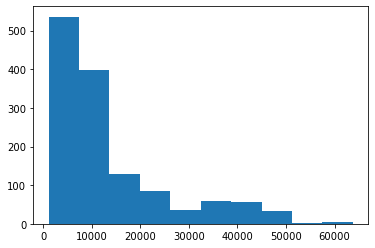

In [4]:
charges=medical['charges']
_ = plt.hist(charges)
plt.show()

In [5]:
sample_mean = np.mean(charges)
sample_mean

13270.422265141257

In [6]:
sample_std = np.std(charges, ddof=1)
sample_std

12110.011236693994

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  <span style='background :yellow' >The fact that the sample represents a random sample from the population tells us that the shape of the data above should be representative of the whole population.  

<span style='background :yellow' >The t-statistic would be more approriate to use here because the population standard deviation is unknown.</span>

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__  <span style='background :yellow' >A one-sided interval (specifically looking at the left tail) is most appropriate since we are only looking to see if the average charge has moved to a certain point in one direction - ie, below 12,000.  The standard confidence interval of 95% should be acceptable.</span>

<span style='background :yellow' >H0 - the mean charges for the population are the same as the mean charges for the sample

<span style='background :yellow' >HA - the mean charges for the population are less than the mean charges for the sample, specifically less than 12000</span>

In [7]:
#generating bootstrap distribution

boot = []
for i in range(5000):
    boot.append(np.mean(medical.sample(frac=1, replace=True)['charges']))

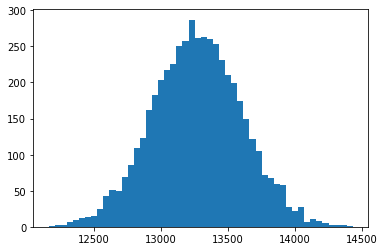

In [8]:
plt.hist(boot, bins=50)
plt.show()

In [9]:
boot_standard_error = np.std(boot, ddof=1)
boot_standard_error

335.06062869545417

In [10]:
boot_mean = np.mean(boot)
boot_mean

13270.408494125893

In [11]:
t_statistic, p_value = ttest_1samp(a=charges, popmean=boot_mean)
print('t_statistic is:', t_statistic, 'p_value is:', p_value)

t_statistic is: 4.15957992354014e-05 p_value is: 0.9999668175592298


In [12]:
#t_stat = (sample_mean - boot_mean) / boot_standard_error
#t_stat

In [13]:
#p_from_t = t.sf(abs(t_stat), df=(len(boot)-1))
#p_from_t

In [14]:
# confidence interval 

charges_t = t.interval(alpha=0.95, df=len(charges)-1, loc=np.mean(charges), scale=sem(charges))
charges_t


(12620.954034192644, 13919.890496089869)

<span style='background :yellow' >Because the p-value is high, we accept the null hypothesis that the mean charges for the population are the same as the mean charges for the sample</span>

<span style='background :yellow' >Now, let's look at the likilhood of a population mean being less than 12000, since that is the client's concern.</span>

In [15]:
x = np.sort(boot)
v = norm(np.mean(x), np.std(x))
y = v.cdf(x)

print(v.cdf(12000))

7.473234716372346e-05


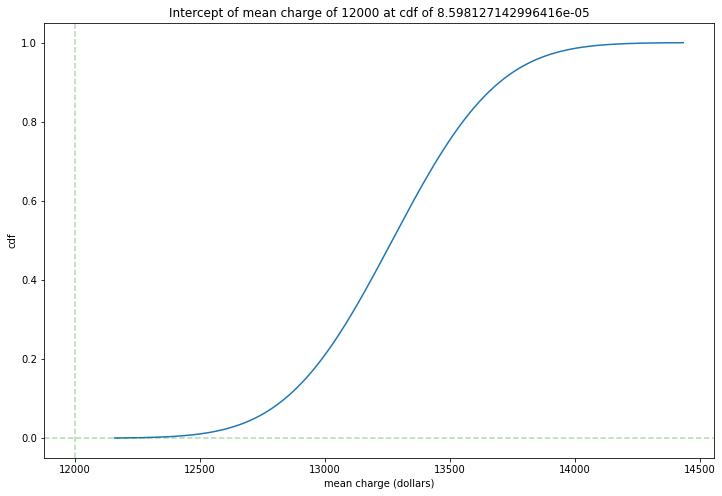

In [16]:
#plot cdf
_ = plt.subplots(figsize=(12,8))
_ = plt.plot(x,y)

_ = plt.axvline(x=12000, color='g', alpha=0.3, linestyle='--')
_ = plt.axhline(v.cdf(12000), color='g', alpha=0.3, linestyle='--')


#_ = plt.axvline(12000, color='g')
#_ = plt.axhline(0.8413447460685429, color='g')
_ = plt.xlabel('mean charge (dollars)')
_ = plt.ylabel('cdf')
_ = plt.title('Intercept of mean charge of 12000 at cdf of 8.598127142996416e-05')

<span style='background :yellow' >The liklihood of the mean of charges having fallen below 12000 is well outside of our confidense margin.  The should reassure the client that the revenue stream has not fallen below this key threshold.</span>

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ <span style='background :yellow' >H0 - People with insurance are charged the same amount as people without insurance

 <span style='background :yellow' >HA - People with insurance are charged a different amount than people without insurance</span>

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ See calculations below

In [17]:
#scipy.stats...t-test on two independent samples

medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [18]:
x_bar = medical.groupby('insuranceclaim')['charges'].mean()
x_bar

insuranceclaim
0     8821.421892
1    16423.928277
Name: charges, dtype: float64

In [19]:
s = medical.groupby('insuranceclaim')['charges'].std()
s

insuranceclaim
0     6446.510127
1    14045.928419
Name: charges, dtype: float64

In [20]:
n = medical.groupby('insuranceclaim')['charges'].count()
n

insuranceclaim
0    555
1    783
Name: charges, dtype: int64

In [21]:
# calculating t manually

In [22]:
sp_manual = np.sqrt((((n[0] - 1)* (s[0]*s[0])) + ((n[1] - 1)* (s[1]*s[1]))) / (n[0] + n[1] -2))
sp_manual

11520.034268775256

In [23]:
t_manual =(x_bar[0] - x_bar[1]) /(sp_manual * (np.sqrt((1 / n[0]) + (1 / n[1]))))
t_manual

-11.893299030876715

In [24]:
# calculate p value from t_stat

degrees_freedom = n[0] + n[1] - 2
degrees_freedom

1336

In [25]:
p = 2 * t.cdf(t_manual, df=degrees_freedom)
p

4.4612302316205886e-31

In [26]:
# calculating t with scipy.stats

charges_zero = medical.loc[medical['insuranceclaim'] == 0]


In [27]:
charges_zero_array = charges_zero['charges'].to_numpy()


In [28]:
charges_one = medical.loc[medical['insuranceclaim'] == 1]


In [29]:
charges_one_array = charges_one['charges'].to_numpy()


In [30]:
t_scipy = ttest_ind(charges_zero_array, charges_one_array)
t_scipy

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

In [31]:
p = 2 * t.cdf(t_scipy[0], df=degrees_freedom)
p

4.461230231620717e-31

<span style='background :yellow' > Because the p value is very small, we reject the null hypothesis in favor of the alternative: people with insurance are charged a different amount than people without insurance.</span>


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ <span style='background :yellow' >When you are doing a z-test you would use norm.cdf from scipy.stats</span>

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test